### Time Series analysis
<br> 
The main goal of this analysis was determining whether the time series data was stationary or not.      
[Stationary series](https://people.duke.edu/~rnau/411diff.htm):  

"A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time."    
    
Generally, stationary time series are easier to forecast so before creating a forecasting model, it is advised to check for stationarity.    

In case the series is stationary, differencing of the values should be performed.    
    
#### Determining stationarity can be done in multiple ways, e.g.:  
   1) Plotting and observing the time series graph   
   2) Observing time series data histogram  
   3) Comparing the mean of time series data subsets  
   4) Performing the [Augmented_Dickey-Fuller_test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

In [1]:
from pandas import read_csv
from datetime import datetime
import pandas as pd

from utils import *
from helper import *

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# load data
def parse(x):
    return datetime.strptime(x, '%d.%m.%Y')

def print_df_info(df):
    print(df.head())
    print(df.tail())
    print(df.shape)
    print(df.dtypes)

In [4]:
df_vod = read_csv('water_level/Kamanje H.csv', sep=';')
df_vod.drop(df_vod.columns[2], axis = 1, inplace=True)
df_vod.vodostaj = df_vod.vodostaj.replace(',','.', regex=True).astype(float)

### Comparison of time series data by year

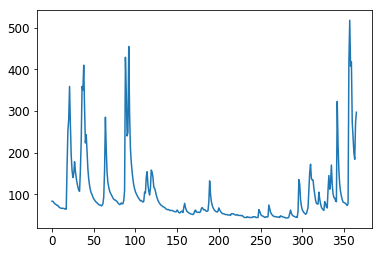

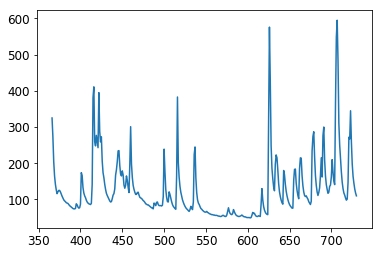

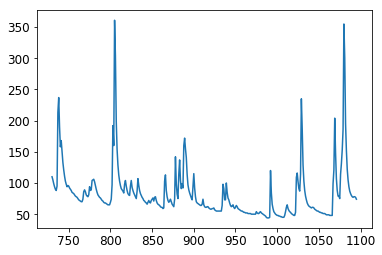

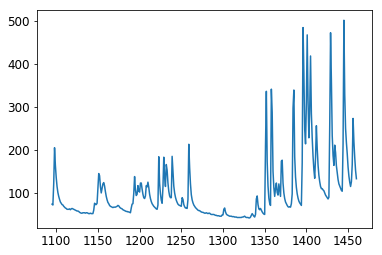

In [5]:
plt.plot(df_vod.index[:366], df_vod.vodostaj[:366])
plt.show()

plt.plot(df_vod.index[366:365*2 + 1], df_vod.vodostaj[366:365*2 + 1])
plt.show()

plt.plot(df_vod.index[365*2:365*3 + 1], df_vod.vodostaj[365*2:365*3 + 1])
plt.show()

plt.plot(df_vod.index[365*3:365*4 + 1], df_vod.vodostaj[365*3:365*4 + 1])
plt.show()

Data shows there are no trends throughout the year. Upon first look, values seem to follow the same mean value, with occassional, short lasting, non-periodical big deviations in value.

### Histogram of time series values

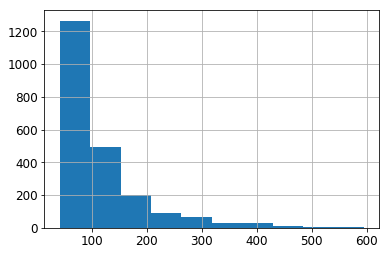

In [6]:
df_vod.vodostaj.hist()

Histogram shows us the most amount of observed values are under 100, which suggests, there is a clear mean value for the data.

### Mean and variance in subsets

In [7]:
sample_nr = df_vod.shape[0]
half = int(sample_nr/2)
print("Number of samples: ", sample_nr)

first = df_vod.vodostaj[:half]
second = df_vod.vodostaj[half:]

print(first.mean(), second.mean())
print(first.var(), second.var())

Number of samples:  2191
102.64566210045662 125.6286496350365
5155.898095882052 7234.292109955674


Dividing the samples in two groups and we can conclude that the mean of the values is relatively similar, while the variance is bigger in the second period. This can be explained because in the later period, the deviations in values are slightly bigger on average, and they occurred more frequently.

In [8]:
from helper import *

def print_stats(df):
    print("mean:{}, var:{}".format(df.mean(), df.var()))
    
for year in by_year:
    data = df_vod.vodostaj[year.start_index: year.start_index + year.days]
    print_stats(data)

mean:96.7972602739726, var:5643.793948517237
mean:128.72054794520548, var:6984.740373325301
mean:82.41917808219178, var:1741.189191630287
mean:103.72404371584699, var:5730.86884497343
mean:126.62465753424658, var:7654.366972753271
mean:103.8054794520548, var:5744.179090772243


### Dickey-Fuller test

In [9]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from pandas import Series
series = Series(df_vod.vodostaj)
X = series.values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.639317
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Low p-value of the Dickey-Fuller score shows that this series has no unit root, i.e. the series is stationary.